# 3D Mixture Model Sample Data Experiment

Experiments with a 3D mixture density RNN consisting of a 2D and 1D model stuck together.

### Generate Synthetic Data

In [6]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
# little path hack to get robojam from one directory up in the filesystem.
from context import * # imports robojam
# import robojam # alternatively do this.

In [8]:
# data:
x_y_t_log = robojam.generate_synthetic_3D_data()
loader = robojam.SequenceDataLoader(num_steps=65, batch_size=64, corpus=x_y_t_log)

Generating 50000 toy data samples.
                  a             b             t
count  50000.000000  50000.000000  50000.000000
mean       0.500334      0.500273      0.099998
std        0.356977      0.357170      0.007093
min       -0.164042     -0.170510      0.000100
25%        0.150651      0.150107      0.095256
50%        0.501459      0.500806      0.100031
75%        0.851671      0.850197      0.104776
max        1.183180      1.226555      0.129928
Total training examples: 49934
Done initialising loader.


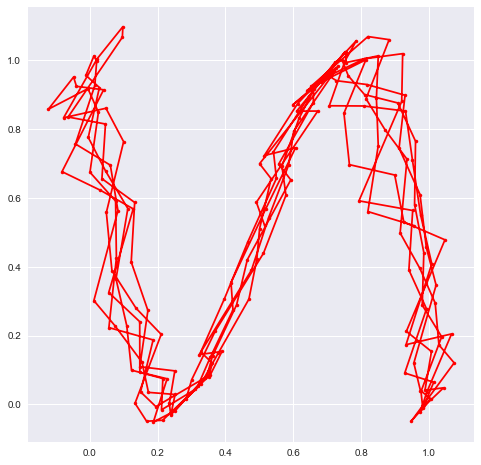

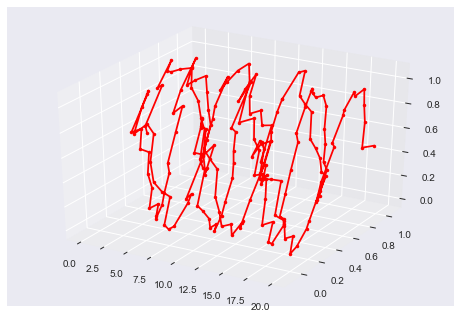

In [9]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import seaborn as sns

def plot_3D_data(perf):
    """Plot in 3D."""
    perf = perf.T
    perf_df = pd.DataFrame({'x':perf[0], 'y':perf[1], 't':perf[2]})
    perf_df['time'] = perf_df.t.cumsum()
    
    ## Plot the performance
    plt.figure(figsize=(8, 8))
    p = plt.plot(perf_df.x, perf_df.y, '.r-')
#     p.axes.set_xlim(0,1.0)
#     p.axes.set_ylim(0,1.0)
    plt.show()
    
    # Plot in 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(perf_df.time, perf_df.x, perf_df.y, '.r-')
#     plt.title('A Performance through Time')
    plt.show()
    
plot_3D_data(x_y_t_log[:200])

### Start and train the network

In [12]:
# Hyperparameters
H_UNITS = 128
N_MIX = 8
BATCH = 64
SEQ_LEN = 64

net = robojam.MixtureRNN(mode=robojam.NET_MODE_TRAIN, n_hidden_units=H_UNITS, n_mixtures=N_MIX, batch_size=BATCH, sequence_length=SEQ_LEN)

INFO:tensorflow:Loading Training Operations
INFO:tensorflow:done initialising: mdrnn-2d-1d-1layers-128units-8mixtures vars: 76872


In [13]:
losses = net.train(loader, 30, saving=True)

INFO:tensorflow:going to train: mdrnn-2d-1d-1layers-128units-8mixtures
INFO:tensorflow:trained epoch 0 of 30


KeyboardInterrupt: 

## Test out generating some data

In [18]:
first_touch = np.array([(np.random.rand()-0.5), (np.random.rand()-0.5), (0.01 + (np.random.rand()-0.5)*0.005)])
print("Test Input:",first_touch)

net = MixtureRNN(mode=NET_MODE_RUN, n_hidden_units=128, n_mixtures=8, batch_size=1, sequence_length=1)
with tf.Session() as sess:
    perf = net.generate_performance(first_touch,1000,sess)
print("Test Output:")
perf_df = pd.DataFrame({'a':perf.T[0], 'b':perf.T[1], 't':perf.T[2]})
perf_df['time'] = perf_df.t.cumsum()
print(perf_df.describe())

('Test Input:', array([ 0.04068382,  0.3311431 ,  0.01172867]))
INFO:tensorflow:Loading Running Operations
INFO:tensorflow:done initialising: mixture-rnn-1layers-128units vars: 76872
INFO:tensorflow:Restoring parameters from /Users/charles/Documents/src/tiny-touch-screen-performances/mdn/mixture-rnn-1layers-128units
Test Output:
                 a            b            t         time
count  1001.000000  1001.000000  1001.000000  1001.000000
mean      0.508192     0.452278     0.089423    42.313661
std       0.318407     0.319878     0.080008    27.154128
min      -1.438167    -1.936479    -1.586950    -2.178858
25%       0.269958     0.212773     0.087926    18.585657
50%       0.467554     0.435521     0.093531    42.103871
75%       0.771416     0.683826     0.099568    65.788604
max       1.818175     2.037449     1.156108    89.512557


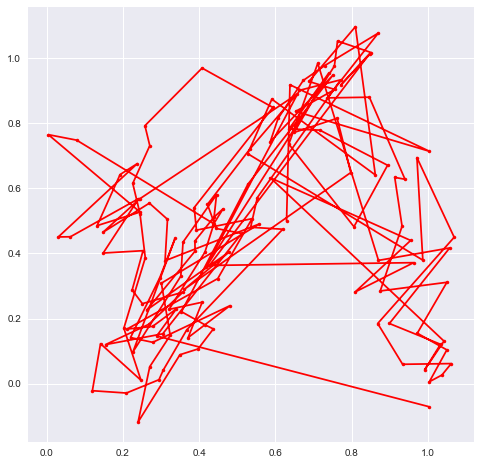

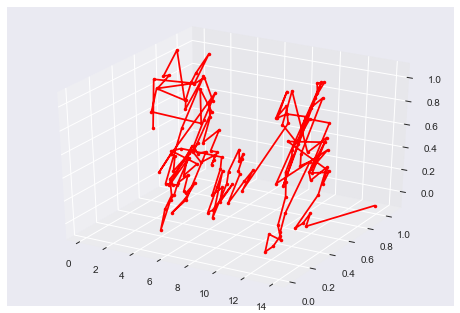

In [27]:
# plots
plot_3D_data(perf[50:200])